In [ ]:
import numpy as np

f = open("/content/sgb128Nodes81to120_weight20.txt", 'r')
nodes_and_edges = f.readline()
nodes_and_edges = np.fromstring(nodes_and_edges, dtype=float, sep=' ')
WEIGHT_MATRIX = np.zeros((40,));

for x in f:
  line = np.fromstring(x, dtype=float, sep = ' ' )
  WEIGHT_MATRIX = np.vstack((WEIGHT_MATRIX,line))

WEIGHT_MATRIX = np.delete(WEIGHT_MATRIX,0,0)
print(WEIGHT_MATRIX)

In [ ]:
import numpy as np

f = open("/content/sgb128Nodes81to120_adj20.txt", 'r')
nodes_and_edges = f.readline()
nodes_and_edges = np.fromstring(nodes_and_edges, dtype=float, sep=' ')
ADJ_MATRIX = np.zeros((40,))

for x in f:
  line = np.fromstring(x, dtype=float, sep = ' ' )
  ADJ_MATRIX = np.vstack((ADJ_MATRIX,line))

ADJ_MATRIX = np.delete(ADJ_MATRIX,0,0)
print(ADJ_MATRIX)

In [ ]:
def is_connected(W):
    n = W.shape[0]
    visited = set()

    def dfs(node):
        visited.add(node)
        for neighbor in np.where(W[node] > 0)[0]:
            if neighbor not in visited:
                dfs(neighbor)

    dfs(0)

    return len(visited) == n

def connected_components(W):
    n = W.shape[0]
    visited = set()
    components = []

    # Depth first search
    def dfs(node):
        visited.add(node)
        for neighbor in np.where(W[node] > 0)[0]:
            if neighbor not in visited:
                dfs(neighbor)

    for i in range(n):
        if i not in visited:
            component = set()
            dfs(i)
            component = np.array(list(visited))
            components.append(component)
            visited.update(component)

    return components

In [ ]:
import numpy as np

def spectral_clustering_W(W):
    Omega1 = []
    Omega2 = []
    n = W.shape[0]

    if not is_connected(W):
        components = connected_components(W)
        return components

    eigenvalues, eigenvectors = np.linalg.eigh(W)
    #print(eigenvalues)
    #print(eigenvectors)

    idx = eigenvalues.argsort()[::1]
    eigenValues = eigenvalues[idx]
    eigenVectors = eigenvectors[:,idx]
    f2 = eigenVectors[:,-2]

    for x in range(len(f2)):
      if f2[x] >= 0:
        Omega1.append(x)
      if f2[x] < 0:
        Omega2.append(x)

    return Omega1, Omega2

W_Omega1, W_Omega2 = spectral_clustering_W(WEIGHT_MATRIX)
print("O1:", W_Omega1)
print("O2:", W_Omega2)

O1: [1, 2, 3, 4, 11, 17, 22, 23, 24, 25, 26, 27, 28, 29, 31, 33, 35, 36, 37, 38, 39]
O2: [0, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 30, 32, 34]


In [ ]:
def spectral_clustering_delta(W):
    Omega1 = []
    Omega2 = []
    n = W.shape[0]

    if not is_connected(W):
        components = connected_components(W)
        return components

    D = np.diag(np.sum(W, axis=1))
    #print(W)
    #print(D)
    Delta = D - W
    print(Delta)
    eigenvalues, eigenvectors = np.linalg.eigh(Delta)

    idx = eigenvalues.argsort()[::1]
    eigenValues = eigenvalues[idx]
    eigenVectors = eigenvectors[:,idx]
    #print(eigenValues)
    #print(eigenVectors)
    e1 = eigenVectors[:, 1]
    #print(eigenValues)
    for x in range(len(e1)):
      if e1[x] > 0:
        Omega1.append(x)
      if e1[x] <= 0:
        Omega2.append(x)

    return Omega1, Omega2

delta_Omega1, delta_Omega2 = spectral_clustering_delta(ADJ_MATRIX)
print("O1:", delta_Omega1)
print("O2:", delta_Omega2)

In [ ]:
def spectral_clustering_normalized(W):
    Omega1 = []
    Omega2 = []
    n = W.shape[0]

    if not is_connected(W):
        components = connected_components(W)
        return components

    D = np.diag(np.sum(W, axis=1))
    #print(D)
    D_inv_sqrt = np.sqrt(np.linalg.inv(D))
    Delta = np.identity(n) - np.matmul(D_inv_sqrt, np.matmul(W, D_inv_sqrt))
    print(Delta)
    eigenvalues, eigenvectors = np.linalg.eigh(Delta)

    idx = eigenvalues.argsort()[::1]
    eigenValues = eigenvalues[idx]
    eigenVectors = eigenvectors[:,idx]

    e1 = eigenVectors[:, 1]

    for x in range(len(e1)):
      if e1[x] > 0:
        Omega1.append(x)
      if e1[x] <= 0:
        Omega2.append(x)

    return Omega1, Omega2

Normalized_Omega1, Normalized_Omega2 = spectral_clustering_normalized(ADJ_MATRIX)
print("O1:", Normalized_Omega1)
print("O2:", Normalized_Omega2)

In [ ]:
def matching_elements(list1, list2):
    return sum(1 for x in list1 if x in list2)

In [ ]:
#Compute the agreement matrix between these partitions: The output
#should be a 3 × 3 matrix Agr so that Agr(k, l) represents the partition
#agreement between method k and method l, 1 ≤ k, l ≤ 3, the 3 methods
#above.
agree = np.zeros((3,3))

a = (W_Omega1, W_Omega2)
b = (delta_Omega1, delta_Omega2)
c = (Normalized_Omega1, Normalized_Omega2)
agree[0,0] = (matching_elements(a[0], a[0]) + matching_elements(a[1], a[1]))/40
agree[1,1] = (matching_elements(b[0], b[0]) + matching_elements(b[1], b[1]))/40
agree[2,2] = (matching_elements(c[0], c[0]) + matching_elements(c[1], c[1]))/40

agree[0,1] = (matching_elements(a[0], b[0]) + matching_elements(a[1], b[1]))/40
agree[0,2] = (matching_elements(a[0], c[0]) + matching_elements(a[1], c[1]))/40

agree[1,0] = (matching_elements(b[0], a[0]) + matching_elements(b[1], a[1]))/40
agree[1,2] = (matching_elements(b[0], c[0]) + matching_elements(b[1], c[1]))/40

agree[2,0] = (matching_elements(c[0], a[0]) + matching_elements(c[1], a[1]))/40
agree[2,1] = (matching_elements(c[0], b[0]) + matching_elements(c[1], b[1]))/40
print(agree)

[[1.    0.975 0.   ]
 [0.975 1.    0.025]
 [0.    0.025 1.   ]]


In [ ]:
COORD_MATRIX = np.loadtxt("/content/sgb128Nodes81to120_coord.txt")
Normalized_Omega1_storage = []
Normalized_Omega2_storage = []

for i in Normalized_Omega1:
  Normalized_Omega1_storage.append((COORD_MATRIX[i,0], COORD_MATRIX[i,1]))
for i in Normalized_Omega2:
  Normalized_Omega2_storage.append((COORD_MATRIX[i,0], COORD_MATRIX[i,1]))
x, y = zip(*Normalized_Omega1_storage)
x1, y1 = zip(*Normalized_Omega2_storage)

plt.scatter(x, y, label = "Norm_Omega1", color='blue',marker='o')
plt.scatter(x1, y1, label = "Norm_Omega2", color='red',marker='o')
plt.legend()
plt.grid(True)
plt.show()

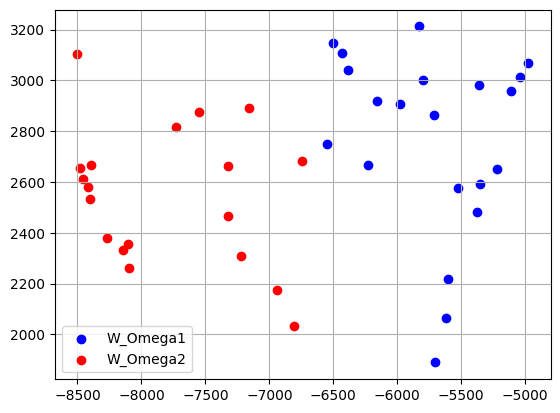

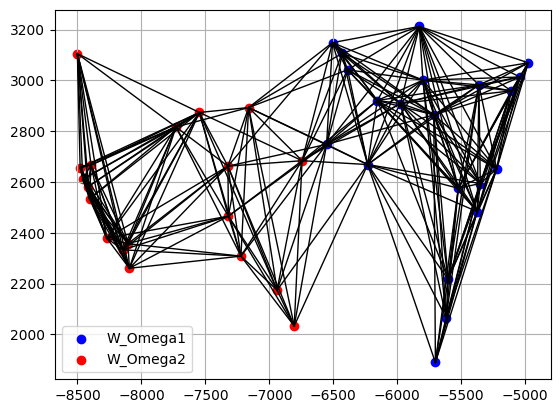

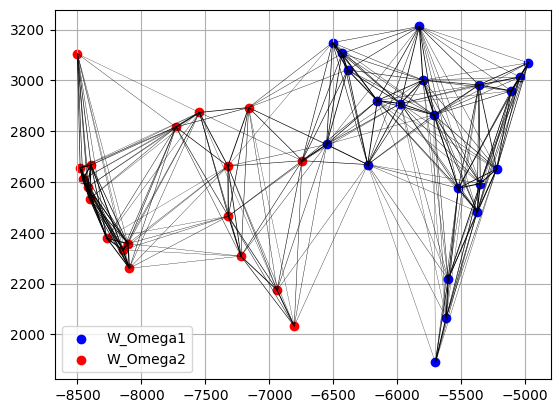

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

W_Omega1_storage = []
W_Omega2_storage = []

for i in W_Omega1:
  W_Omega1_storage.append((COORD_MATRIX[i,0], COORD_MATRIX[i,1]))
for i in W_Omega2:
  W_Omega2_storage.append((COORD_MATRIX[i,0], COORD_MATRIX[i,1]))
x, y = zip(*W_Omega1_storage)
x1, y1 = zip(*W_Omega2_storage)

plt.scatter(x, y, label = "W_Omega1", color='blue',marker='o')
plt.scatter(x1, y1, label = "W_Omega2", color='red',marker='o')
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(x, y, label = "W_Omega1", color='blue',marker='o')
plt.scatter(x1, y1, label = "W_Omega2", color='red',marker='o')
for i in range(len(ADJ_MATRIX)):
    for j in range(i+1, len(ADJ_MATRIX)):
        if ADJ_MATRIX[i, j] == 1:
            plt.plot([COORD_MATRIX[i, 0], COORD_MATRIX[j, 0]], [COORD_MATRIX[i, 1], COORD_MATRIX[j, 1]], color='black', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(x, y, label = "W_Omega1", color='blue',marker='o')
plt.scatter(x1, y1, label = "W_Omega2", color='red',marker='o')
for i in range(len(ADJ_MATRIX)):
    for j in range(i+1, len(ADJ_MATRIX)):
        if WEIGHT_MATRIX[i, j] != 0:
            plt.plot([COORD_MATRIX[i, 0], COORD_MATRIX[j, 0]], [COORD_MATRIX[i, 1], COORD_MATRIX[j, 1]], color='black', linewidth=WEIGHT_MATRIX[i,j])
plt.legend()
plt.grid(True)
plt.show()

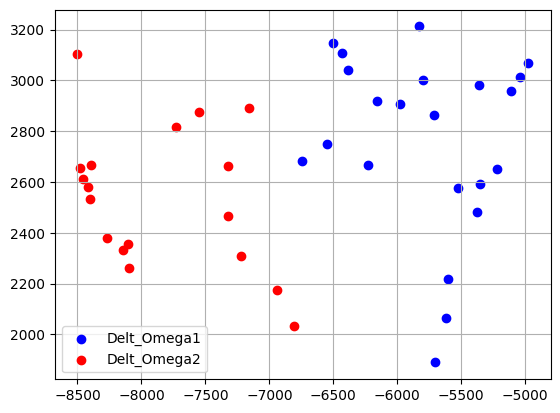

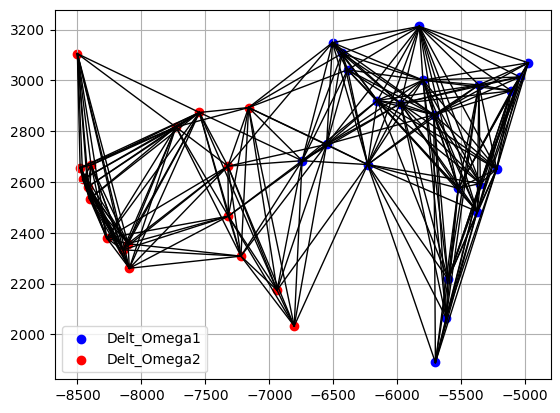

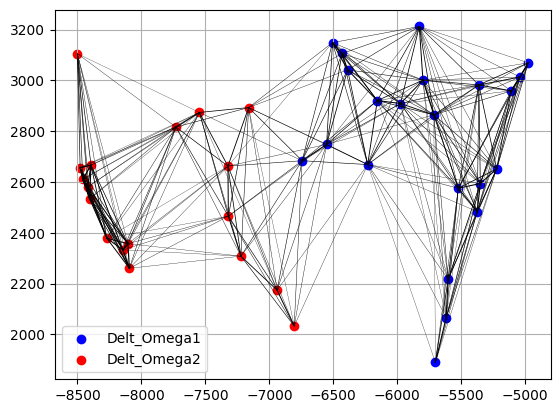

In [ ]:
delta_Omega1_storage = []
delta_Omega2_storage = []

for i in delta_Omega1:
  delta_Omega1_storage.append((COORD_MATRIX[i,0], COORD_MATRIX[i,1]))
for i in delta_Omega2:
  delta_Omega2_storage.append((COORD_MATRIX[i,0], COORD_MATRIX[i,1]))
x, y = zip(*delta_Omega1_storage)
x1, y1 = zip(*delta_Omega2_storage)

plt.scatter(x, y, label = "Delt_Omega1", color='blue',marker='o')
plt.scatter(x1, y1, label = "Delt_Omega2", color='red',marker='o')
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(x, y, label = "Delt_Omega1", color='blue',marker='o')
plt.scatter(x1, y1, label = "Delt_Omega2", color='red',marker='o')
for i in range(len(ADJ_MATRIX)):
    for j in range(i+1, len(ADJ_MATRIX)):
        if ADJ_MATRIX[i, j] == 1:
            plt.plot([COORD_MATRIX[i, 0], COORD_MATRIX[j, 0]], [COORD_MATRIX[i, 1], COORD_MATRIX[j, 1]], color='black', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()


plt.scatter(x, y, label = "Delt_Omega1", color='blue',marker='o')
plt.scatter(x1, y1, label = "Delt_Omega2", color='red',marker='o')
for i in range(len(ADJ_MATRIX)):
    for j in range(i+1, len(ADJ_MATRIX)):
        if WEIGHT_MATRIX[i, j] != 0:
            plt.plot([COORD_MATRIX[i, 0], COORD_MATRIX[j, 0]], [COORD_MATRIX[i, 1], COORD_MATRIX[j, 1]], color='black', linewidth=WEIGHT_MATRIX[i,j])
plt.legend()
plt.grid(True)
plt.show()

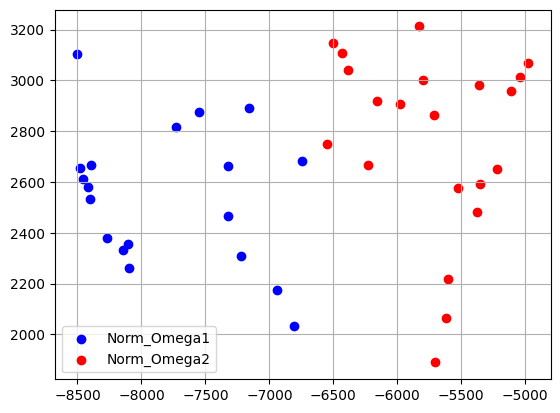

In [ ]:
Normalized_Omega1_storage = []
Normalized_Omega2_storage = []

for i in Normalized_Omega1:
  Normalized_Omega1_storage.append((COORD_MATRIX[i,0], COORD_MATRIX[i,1]))
for i in Normalized_Omega2:
  Normalized_Omega2_storage.append((COORD_MATRIX[i,0], COORD_MATRIX[i,1]))
x, y = zip(*Normalized_Omega1_storage)
x1, y1 = zip(*Normalized_Omega2_storage)

plt.scatter(x, y, label = "Norm_Omega1", color='blue',marker='o')
plt.scatter(x1, y1, label = "Norm_Omega2", color='red',marker='o')
plt.legend()
plt.grid(True)
plt.show()

[ 1.71915218e-02 -2.65409456e-03  7.31122187e-04 -5.99344793e-04
  4.18076728e-03  2.34826884e-01 -2.42983947e-01  2.99052651e-01
  2.72410369e-01  2.47575094e-01  2.51472991e-01 -7.59900371e-04
  2.62074024e-01  2.50787734e-01 -4.38818308e-01 -1.78096843e-01
 -3.19862432e-02 -7.15687688e-03  2.30632913e-01  2.27768674e-02
 -1.45250137e-01  1.50682899e-01  1.24143214e-02  5.48210862e-03
  1.71085051e-02 -2.48076495e-04 -2.04525194e-03  1.40363029e-02
  1.96672511e-03 -8.31138795e-04  2.09646621e-01 -1.76284312e-03
 -3.07850756e-01 -6.77496935e-03 -5.68164378e-02  5.04782968e-04
 -1.76978800e-03  1.07461783e-02 -4.64596919e-03 -7.25754910e-03]
[ 7.19524137e-03 -1.11082605e-03  3.05999010e-04 -2.50848080e-04
  1.74979334e-03 -3.54205306e-01 -1.01697089e-01  1.25163759e-01
  1.14013379e-01 -2.24625743e-02 -1.58595670e-01 -3.18045848e-04
  1.09687321e-01  1.04963595e-01 -1.83660469e-01 -7.45396190e-02
 -1.33873357e-02 -2.99539816e-03  9.65274301e-02  9.53289837e-03
 -6.07921474e-02 -7.6470

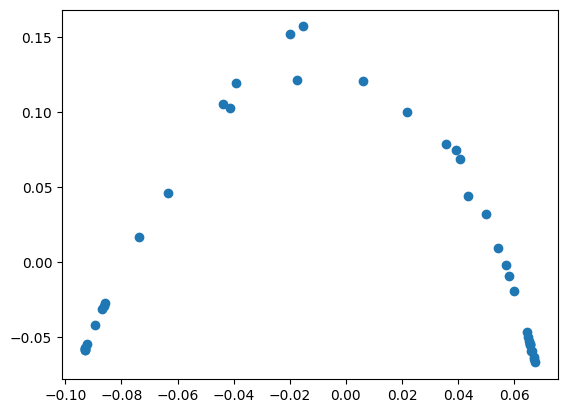

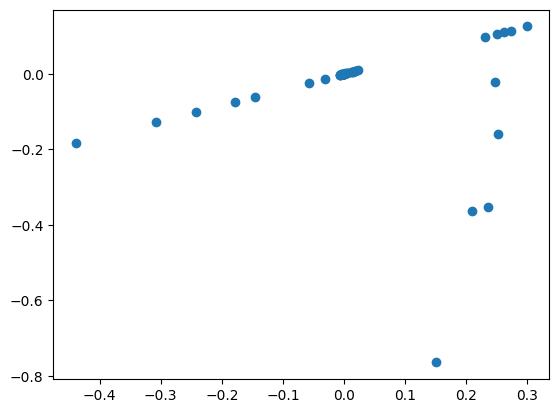

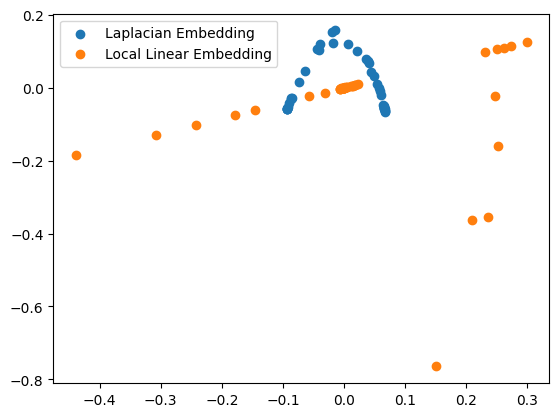

In [ ]:
def sortEdges (weightMatrix):
  edges = [];
  size = weightMatrix.shape[0];
  for i in range(size):
    for j in range(i,size):
      if weightMatrix[i,j] > 0.0001:
        edges.append((weightMatrix[i,j], i, j));
  edges.sort(reverse=True);
  return edges

#Laplacian Eigenmap embedding algorithm
def laplacianEigenmap (W, degree, dimension):
  normLap, pseudoInv = normalLaplacian (degree, W);
  #Find the dimension+1 (3) lowest eigenpairs:
  eigenvalues, eigenvectors = np.linalg.eig(normLap);
  sortedIndices = np.argsort(eigenvalues);
  eVectorMatrix = np.zeros((40,0));
  for i in range(dimension):
    #print(eigenvectors[:,[sortedIndices[i] + 1]].shape)
    eVectorMatrix = np.append(eVectorMatrix, eigenvectors[:,[sortedIndices[i] + 1]], axis = 1)
  Y = np.transpose(eVectorMatrix) @ pseudoInv;
  return Y

#might not be necessary to resort the edges (?)
edges = sortEdges(WEIGHT_MATRIX)

#Function to calculate the normalized laplacian matrix
def normalLaplacian (degreeMatrix, weightMatrix):
  lapMatrix = np.subtract(degreeMatrix,weightMatrix);
  i_matrix = np.eye(40)
  pseudoInverseMatrix = np.zeros((degreeMatrix.shape[0],degreeMatrix.shape[0]));
  for i in range(degreeMatrix.shape[0]):
    if degreeMatrix[i] != 0:
      pseudoInverseMatrix[i,i] = 1/(math.sqrt(degreeMatrix[i]));

  normLapMatrix = np.subtract(i_matrix, pseudoInverseMatrix @ weightMatrix @ pseudoInverseMatrix)
  return [normLapMatrix, pseudoInverseMatrix]


#Calculating the degree matrix
degreeMatrix = np.sum(WEIGHT_MATRIX, axis=1)

def localLinearEmbedding(graph, K, dimension):
    # Construct the weight matrix B:
    B = np.zeros((40, 40))
    for i in range(40):
        set = []
        # Finding the K nearest neighbors to point i
        for j in range(40):
            if i != j:
                set.append((j, np.linalg.norm(graph[:, i] - graph[:, j])))
        set.sort(key=lambda x: x[1])
        set = set[:K]  # Keep only the K nearest neighbors
        neighbors_indices = [idx for idx, _ in set]
        # Solve the linear system to find the reconstruction weights
        X = np.vstack([graph[:, idx] for idx in neighbors_indices]).T
        if X.shape[1] == 0:  # If there are no neighbors, set the weight to 0
            continue
        W = np.linalg.pinv(X.T @ X) @ X.T  # Pseudo-inverse of X
        for j, idx in enumerate(neighbors_indices):
            B[i, idx] = np.sum((graph[:, i] - graph[:, idx]) ** 2)
        B[i, neighbors_indices] = np.linalg.lstsq(X, graph[:, i], rcond=None)[0]
    # Solve the eigenproblem
    L = np.eye(40) - B
    M = L.T @ L
    eigenvalues, eigenvectors = np.linalg.eig(M)
    sortedIndices = np.argsort(eigenvalues)
    eVectorMatrix = np.zeros((40, 0))
    for i in range(min(dimension, 39)):  # Ensure valid range for indices
        eVectorMatrix = np.append(eVectorMatrix, eigenvectors[:, [sortedIndices[i]]], axis=1)
    return np.transpose(eVectorMatrix)



def solve_optimization_problem(C, K):
    u = cp.Variable(K)
    objective = cp.Minimize(cp.quad_form(u, C))
    constraints = [u >= 0, cp.sum(u) == 1]
    prob = cp.Problem(objective, constraints)
    prob.solve()
    return u.value


#3.1
Y1 = laplacianEigenmap(WEIGHT_MATRIX, degreeMatrix, 2);
#print("degreeMatrix: \n", degreeMatrix)
#print("Geometric graph for problem 2.1", Y1)
plt.scatter(Y1[0,:], Y1[1,:]);
plt.figure();

#3.2
Y = laplacianEigenmap(WEIGHT_MATRIX, degreeMatrix, 10);
#print("Geometric graph for part 2.2a:",Y)
Y2 = localLinearEmbedding(Y, 4, 2)
#print("Geometric graph for part 2.2b", Y2)
plt.scatter(Y2[0,:], Y2[1,:]);
plt.figure();

#Plotting both scatterplots on one figure:
plt.scatter(Y1[0,:], Y1[1,:], label="Laplacian Embedding");
plt.scatter(Y2[0,:], Y2[1,:], label="Local Linear Embedding");
print(Y2[0,:])
print(Y2[1,:])
plt.legend();

(2, 40)


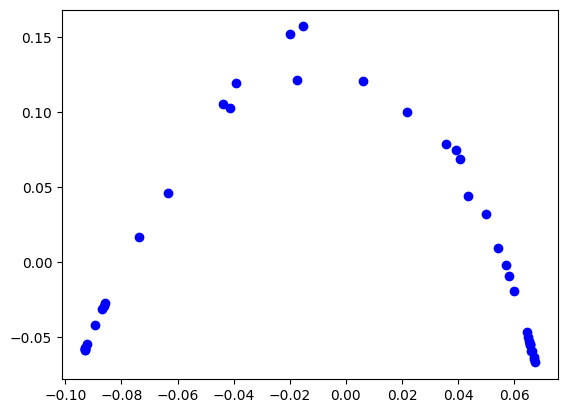

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cvxpy as cp

f = open("/content/sgb128Nodes81to120_weight20.txt", 'r');
nodes_and_edges = f.readline();
nodes_and_edges = np.fromstring(nodes_and_edges, dtype=int, sep=' ');
WEIGHT_MATRIX = np.zeros((40,));

for x in f:
  line = np.fromstring(x, dtype=float, sep = ' ' );
  WEIGHT_MATRIX = np.vstack((WEIGHT_MATRIX,line));


WEIGHT_MATRIX = np.delete(WEIGHT_MATRIX,0,0);
def compute_graph_laplacian(W):
    D = np.diag(np.sum(W, axis=1))
    #print(D)
    n = W.shape[0]
    D_inv_sqrt = np.sqrt(np.linalg.inv(D))
    D_inv = D_inv_sqrt
    Delta = np.identity(n) - np.matmul(D_inv_sqrt, np.matmul(W, D_inv_sqrt))
    return Delta

NormalizedGraphLaplacian = compute_graph_laplacian(WEIGHT_MATRIX)
#print(NormalizedGraphLaplacian)

def compute_bottom_eigenvectors(NormalizedGraphLaplacian, d):
    # Step 1: Compute eigenvalues and eigenvectors of the normalized Laplacian
    eigvals, eigvecs = np.linalg.eigh(NormalizedGraphLaplacian)
    # Step 2: Sort eigenvalues and corresponding eigenvectors in ascending order
    idx = np.argsort(eigvals)
    sorted_eigvals = eigvals[idx]
    sorted_eigvecs = eigvecs[:, idx]
    # Step 3: Select the bottom d+1 eigenvectors
    bottom_eigvecs = sorted_eigvecs[:, :d+1]
    return bottom_eigvecs

D = np.diag(np.sum(WEIGHT_MATRIX, axis=1))
#print(D)
D_inv_sqrt = np.sqrt(np.linalg.inv(D))
d = 2
bottom_eigenvectors = compute_bottom_eigenvectors(NormalizedGraphLaplacian, d)
#print(bottom_eigenvectors)
bottom_eigenvectors = bottom_eigenvectors[:,1:3]
bottom_eigenvectors = bottom_eigenvectors.T
Y = bottom_eigenvectors @ D_inv_sqrt
print(Y.shape)
for i in range(40):
  plt.scatter(Y[0,i], Y[1,i],color='blue');
plt.show()

def compute_pairwise_distances(X):
    n_samples = 40
    distances = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            distances[i, j] = np.sqrt(((X[0][j]-X[0][i]) + (X[1][j]-X[1][i]))**2)
            distances[j,i] = distances[i,j]
    return distances

distances = compute_pairwise_distances(Y)
